# Week1 day4 A

## Multivariate Gaussian Classifier

### task1a: load dataset
trainA.dat, trainB.dat,....

In [109]:
import numpy as np
# TODO
TrainA = np.loadtxt('./dataW1D4/trainA.dat')
TrainB = np.loadtxt('./dataW1D4/trainB.dat')
TrainC = np.loadtxt('./dataW1D4/trainC.dat')
TestA = np.loadtxt('./dataW1D4/testA.dat')
TestB = np.loadtxt('./dataW1D4/testB.dat')
TestC = np.loadtxt('./dataW1D4/testC.dat')
TrainA2=np.fromfile

#### Q: How many points from each class for training and how many for testing? How many features?
训练集里有400个数据，测试集有200个数据。
特征有两个

In [110]:
print('train A:', TrainA.shape)
print('train B:', TrainB.shape)
print('train C:', TrainC.shape)
print('test A:', TestA.shape)
print('test B:', TestB.shape)
print('test C:', TestC.shape)

train A: (200, 2)
train B: (200, 2)
train C: (200, 2)
test A: (100, 2)
test B: (100, 2)
test C: (100, 2)


### task1b: plot scatters

In [111]:
import matplotlib.pyplot as plt
import numpy as np

In [112]:
TrainA


array([[-2.3482615e+00, -2.8524522e+00],
       [-2.2061087e+00, -3.4048884e+00],
       [-3.6532267e+00, -3.1857296e-01],
       [-2.0311284e+00,  1.3771551e+00],
       [-1.1256233e+00,  1.2039332e+00],
       [ 6.3873155e-01,  1.2542087e+00],
       [-1.8842116e+00, -2.3819456e+00],
       [ 2.7404767e-01, -1.2888815e+00],
       [-2.5383434e+00, -2.1685614e+00],
       [-3.8378952e+00, -2.0026716e+00],
       [-3.0238316e+00, -2.6118581e+00],
       [-2.7990074e+00, -2.2755202e+00],
       [-1.1208342e+00, -6.0650338e-01],
       [-3.8886415e+00, -1.3373045e+00],
       [-2.1741011e+00, -3.9302618e+00],
       [-3.5596158e+00, -1.6129454e+00],
       [-5.8935788e+00,  1.7429752e+00],
       [-1.6435943e+00, -2.0760193e+00],
       [-3.2136048e+00, -1.3317680e+00],
       [-3.9435363e-01, -4.9416124e+00],
       [-2.4213050e+00, -3.1348979e+00],
       [-3.6752985e-01, -2.6460031e+00],
       [-5.2062570e-01, -1.7258449e+00],
       [ 1.0078543e+00, -7.4202106e-01],
       [-2.92740

In [113]:
TrainA[:,0]


array([-2.3482615 , -2.2061087 , -3.6532267 , -2.0311284 , -1.1256233 ,
        0.63873155, -1.8842116 ,  0.27404767, -2.5383434 , -3.8378952 ,
       -3.0238316 , -2.7990074 , -1.1208342 , -3.8886415 , -2.1741011 ,
       -3.5596158 , -5.8935788 , -1.6435943 , -3.2136048 , -0.39435363,
       -2.421305  , -0.36752985, -0.5206257 ,  1.0078543 , -2.9274039 ,
       -3.6155525 , -0.6578564 , -2.5722025 , -2.5435235 , -1.3183204 ,
       -1.3724083 , -1.461043  , -0.44104393, -0.78880123, -3.6666632 ,
       -1.4315291 , -2.8262227 , -3.3852026 , -1.8372152 , -1.9031675 ,
       -2.7493923 , -1.2347524 , -1.0359024 , -1.2383548 , -2.721299  ,
       -3.8697469 , -2.8636022 , -2.7994678 , -1.8781302 , -1.0220694 ,
        1.0175794 , -2.0040502 , -2.1266048 , -2.3605988 , -3.2363227 ,
       -1.4018896 , -2.1886551 , -1.2369208 , -0.76232134, -3.768864  ,
       -0.77202347, -3.1381678 , -3.064469  , -3.054738  , -2.4379165 ,
       -4.152279  , -0.83110864, -2.8668949 , -0.64273921,  0.79

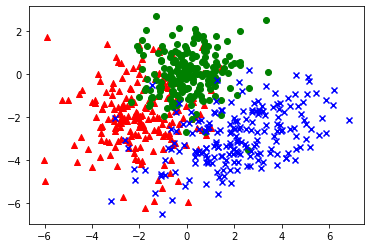

In [114]:
plt.scatter(TrainA[:,0],TrainA[:,1],marker='^',c='r') 
plt.scatter(TrainB[:,0],TrainB[:,1],marker='o',c='g')
plt.scatter(TrainC[:,0],TrainC[:,1],marker='x',c='b')
# you can change the color if you dislike them

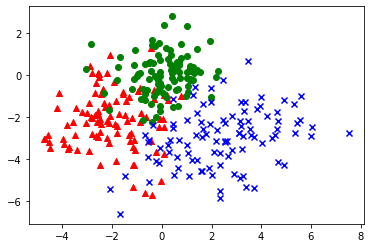

In [115]:
plt.scatter(TestA[:,0],TestA[:,1],marker='^',c='r') 
plt.scatter(TestB[:,0],TestB[:,1],marker='o',c='g')
plt.scatter(TestC[:,0],TestC[:,1],marker='x',c='b')

### task 2: compute the mean and variance of train data in each class

#### $\mu$ of trainA

In [116]:
##mean function examples
a=np.array([[1,2],[3,4]])
mua=np.mean(a)
print(mua)#对矩阵内所有元素求均值
mub=np.mean(a,0)#对各列求均值
print(mub)

2.5
[2. 3.]


In [117]:
muA = np.mean(TrainA,0)
print(muA)
print(muA.shape)

[-1.97111526 -1.90272101]
(2,)


#### Question: why is it not **np.mean(trainA,1)**
因为对每一列求均值，即第0维度的值，而不是每一行，如果是每一行则产生200个均值。

In [118]:
muA1=np.mean(TrainA,1)
print(muA1)
print(muA1.shape)

[-2.60035685 -2.80549855 -1.98589983 -0.32698665  0.03915495  0.94647013
 -2.1330786  -0.50741691 -2.3534524  -2.9202834  -2.81784485 -2.5372638
 -0.86366879 -2.612973   -3.05218145 -2.5862806  -2.0753018  -1.8598068
 -2.2726864  -2.66798302 -2.77810145 -1.50676648 -1.1232353   0.13291662
 -3.58918215 -3.03544775 -1.82658825 -2.8123913  -2.00922205 -0.64285282
 -1.36099635 -1.26330905 -0.42547384 -0.7018519  -3.7641889  -1.7321775
 -2.31797245 -0.98979965 -1.28100618 -1.8977127  -2.11890545 -3.0730751
 -3.1669472  -1.8814467  -1.45153375 -2.54098265 -2.5592422  -2.4249604
 -0.57123033 -0.58785446 -0.7427898  -2.23373165 -2.00455195 -1.87385015
 -3.48296325 -3.63554495 -2.47264955 -0.05645825 -1.80947927 -1.86962387
 -0.54116491 -2.0436012  -2.6180771  -2.54940245 -2.92820635 -3.8101542
 -0.97107832 -1.81981441  0.14357983 -1.02519815 -1.37686755 -1.19888744
 -0.07731905 -3.33463665 -3.0397441  -2.1420618  -1.7706099  -2.7146213
 -2.11909107 -3.03524345 -0.68265579 -1.50788294 -2.659303

In [119]:
##cov example
t=np.array([[1,2],[3,4]])
covT=np.cov(t,rowvar=False)
print(covT)
print(covT.shape)

t1=np.array([1,2,3])
covT1=np.cov(t1,rowvar=True)
print(covT1)
print(covT1.shape)

[[2. 2.]
 [2. 2.]]
(2, 2)
1.0
()


#### Question: what if rowvar = True
rowvar=false时是按照列向量，本例子中就是(ta1,ta2)

In [120]:
covA = np.cov(TrainA, rowvar= False) # Question: what if rowvar = True
print(covA)
print(covA.shape)

[[1.98212915 0.11832453]
 [0.11832453 2.28862765]]
(2, 2)


In [121]:
covAt=np.cov(TrainA,rowvar=True)
print(covAt.shape)

(200, 200)


In [122]:
# TODO 

In [123]:
muB = np.mean(TrainB,0)
muC = np.mean(TrainC,0)
covB = np.cov(TrainB,rowvar=False)
covC = np.cov(TrainC,rowvar=False)

#### task3: compute the posterior probabilities

you can use : https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.multivariate_normal.html#scipy.stats.multivariate_normal

In [124]:
from scipy.stats import multivariate_normal

In [125]:
def cal_multi_normals(x,muA, muB, muC, covA, covB, covC):
    '''
    compute data x's  probabilitiw of three Gaussian models 
    '''
    ya = multivariate_normal.pdf(x, muA, covA); 
    yb = multivariate_normal.pdf(x, muB, covB); 
    yc = multivariate_normal.pdf(x, muC, covC); 
    y = np.stack((ya,yb,yc),axis=1)
    return y

yA = cal_multi_normals(TestA, muA, muB, muC, covA, covB, covC)
yB = cal_multi_normals(TestB, muA, muB, muC, covA, covB, covC)
yC = cal_multi_normals(TestC, muA, muB, muC, covA, covB, covC)

In [135]:
ya = multivariate_normal.pdf(TestA, muA, covA)
print(ya.shape)
print(yA.shape)

(100,)
(100, 3)


#### task 4: assign the data to the class has the maximum posterior probabilities

In [127]:
max=np.argmax(yA,axis=1)
print(max)
print(max.shape)
index_A = np.where(max==0)  # the index which was classified as A
index_B = np.where(max==1)  # the index which was classified as B
index_C = np.where(max==2)

print(np.size(index_A),np.size(index_B),np.size(index_C))
print(index_C)
result_c=TestC[index_C,:]
print(result_c.shape)
print(result_c)

[0 0 0 0 0 0 0 2 0 1 1 0 0 0 0 0 0 2 1 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 2 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 2 0 0 0 0 0 0 1 0 2
 0 0 0 1 0 0 0 0 0 0 0 0 2 2 1 0 0 0 0 0 0 1 2 0 0 0]
(100,)
80 11 9
(array([ 7, 17, 20, 45, 64, 73, 86, 87, 96], dtype=int64),)
(1, 9, 2)
[[[ 2.2301578  -2.6063982 ]
  [ 0.68418388 -3.0804266 ]
  [ 3.7110458  -5.3920311 ]
  [ 0.34248818 -3.0914984 ]
  [ 4.0039507  -1.0531931 ]
  [ 1.0078471  -2.1166739 ]
  [ 2.1651674  -3.1566452 ]
  [ 3.1946882  -1.302157  ]
  [-2.0917943  -5.4341647 ]]]


In [128]:
t_result_c=result_c.reshape(np.size(index_C),2)
print(t_result_c)

[[ 2.2301578  -2.6063982 ]
 [ 0.68418388 -3.0804266 ]
 [ 3.7110458  -5.3920311 ]
 [ 0.34248818 -3.0914984 ]
 [ 4.0039507  -1.0531931 ]
 [ 1.0078471  -2.1166739 ]
 [ 2.1651674  -3.1566452 ]
 [ 3.1946882  -1.302157  ]
 [-2.0917943  -5.4341647 ]]


In [129]:
X = np.array([[0, 1], [2, 3], [4, 5], [6, 7], [8, 9], [10, 11], [12, 13], [14, 15], [16, 17], [18, 19]])
print(X)
print(X[:, 0])
print(X[0,:])

[[ 0  1]
 [ 2  3]
 [ 4  5]
 [ 6  7]
 [ 8  9]
 [10 11]
 [12 13]
 [14 15]
 [16 17]
 [18 19]]
[ 0  2  4  6  8 10 12 14 16 18]
[0 1]


In [130]:
'''
    此函数找到最大的posterior probability

Input:
    y: three columns of probabilities computed from three Gaussian pdf
    test_set
Output:
    result_A:被分类到A的样本点
'''

def decision_rule_max_pos(y,test_set):
    maximum_class=np.argmax(y,axis=1)
    
    index_A=np.where(maximum_class==0)
    index_B=np.where(maximum_class==1)
    index_C=np.where(maximum_class==2)

    result_A=test_set[index_A,:].reshape(np.size(index_A),2)
    result_B=test_set[index_B,:].reshape(np.size(index_B),2)
    result_C=test_set[index_C,:].reshape(np.size(index_C),2)
    plt.figure(figsize=(4,4))
    plt.scatter(result_A[:,0],result_A[:,1],marker='^',c='r')  
    plt.scatter(result_B[:,0],result_B[:,1],marker='o',c='g')  
    plt.scatter(result_C[:,0],result_C[:,1],marker='x',c='b')
    plt.xlim([-6,6])
    plt.ylim([-6,6])
    return result_A, result_B, result_C


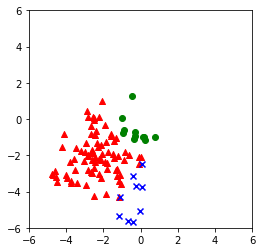

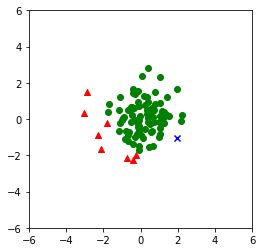

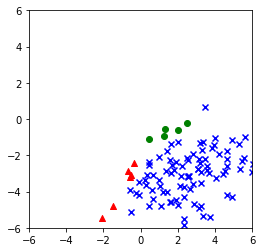

In [131]:
a_a,a_b,a_c=decision_rule_max_pos(yA,TestA)
b_a,b_b,b_c=decision_rule_max_pos(yB,TestB)
c_a,c_b,c_c=decision_rule_max_pos(yC,TestC)

(-6.0, 6.0)

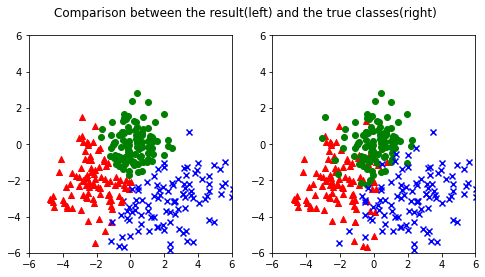

In [132]:
fig, axs = plt.subplots(1,2,figsize=(8,4))
fig.suptitle('Comparison between the result(left) and the true classes(right)')
# result of testA
axs[0].scatter(a_a[:,0],a_a[:,1],marker='^',c='r') 
axs[0].scatter(a_b[:,0],a_b[:,1],marker='o',c='g')
axs[0].scatter(a_c[:,0],a_c[:,1],marker='x',c='b')
# result of testB
axs[0].scatter(b_a[:,0],b_a[:,1],marker='^',c='r') 
axs[0].scatter(b_b[:,0],b_b[:,1],marker='o',c='g')
axs[0].scatter(b_c[:,0],b_c[:,1],marker='x',c='b')
# result of testC
axs[0].scatter(c_a[:,0],c_a[:,1],marker='^',c='r') 
axs[0].scatter(c_b[:,0],c_b[:,1],marker='o',c='g')
axs[0].scatter(c_c[:,0],c_c[:,1],marker='x',c='b')
# plot the true classes
axs[1].scatter(TestA[:,0],TestA[:,1],marker='^',c='r') 
axs[1].scatter(TestB[:,0],TestB[:,1],marker='o',c='g')
axs[1].scatter(TestC[:,0],TestC[:,1],marker='x',c='b')
axs[0].set_xlim([-6,6])
axs[0].set_ylim([-6,6])
axs[1].set_xlim([-6,6])
axs[1].set_ylim([-6,6])

In [133]:
##计算精度
totalN=TestA.shape[0]+TestB.shape[0]+TestC.shape[0]
correctN=a_a.shape[0]+b_b.shape[0]+c_c.shape[0]
acc=correctN/totalN
print(acc)

0.8666666666666667


Text(0.5, 0.92, 'Train A')

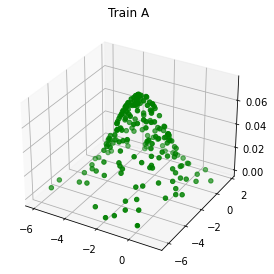

In [134]:
from matplotlib import cm

#把TrainA放在3d图中
fig=plt.figure(figsize=(20,10))
ax=fig.add_subplot(1,4,1,projection='3d')
x,y=TrainA[:,0],TrainA[:,1]
z=multivariate_normal.pdf(TrainA,muA,covA)
ax.scatter3D(x,y,z,c='g')
ax.set_title('Train A')
